In [190]:
# NUMPY
import numpy as np

# MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.context('dark_background')
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

# SKLEARN 
from sklearn.metrics import pairwise_distances

# POT
import ot
from ot import sinkhorn, emd
# from ot.bregman import sinkhorn, greenkhorn

# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/'
sys.path.insert(0, path_files) 

# GREENKHORN 
# from greenkhorn.sinkhorn import sinkhorn as sinkhgreen
# SCREENKHORN
from screenkhorn.screenkhorn import Screenkhorn
# np.random.seed(3946)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data generation

In [191]:
n_1 = 200# nb samples
n_2 = 200
mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n_1, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n_2, mu_t, cov_t)

a = np.ones((n_1,)) / n_1
b = np.ones((n_2,)) / n_2  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()
reg = 1.

K = np.exp(-M/reg)

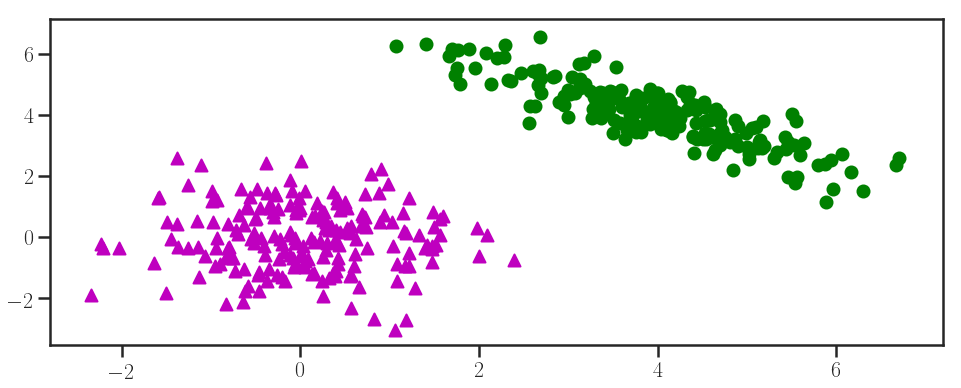

In [192]:
plt.scatter(xs[:,0], xs[:,1], marker='^', c='m')
plt.scatter(xt[:,0], xt[:,1], marker='o', c='g');

## Sinkhorn's algorithm from POT

In [193]:
P_sink = sinkhorn(a, b, M, reg, log=True)

In [194]:
# Print P^star, u_sink = e^{u^star}, v_sink = e^{v^star}
P_star = P_sink[0]
outputs_dict = P_sink[1]
exp_u_star = outputs_dict['u']
exp_v_star = outputs_dict['v']

## Some norms of $e^{u^\star}$ and $e^{v^\star}$ 

In [195]:
## L_2 norm
norm2exp_u_star = np.linalg.norm(exp_u_star, 2)
norm2exp_v_star  = np.linalg.norm(exp_v_star, 2)

norm2exp_u_star, norm2exp_v_star

(0.07203108233084705, 0.1003602149227786)

In [196]:
## L_1 norm
norm1exp_u_star = np.linalg.norm(exp_u_star, 1)
norm1exp_v_star  = np.linalg.norm(exp_v_star, 1)

norm1exp_u_star, norm1exp_v_star

(1.0121100647082044, 1.417490887850121)

In [197]:
## L_infty norm 
norminftyexp_u_star = np.max(exp_u_star)
norminftyexp_v_star = np.max(exp_v_star)

norminftyexp_u_star, norminftyexp_v_star

(0.007556544804472015, 0.00834824337501394)

In [198]:
## L_-infty norm 
norm_inftyexp_u_star = np.min(exp_u_star)
norm_inftyexp_v_star = np.min(exp_v_star)

norm_inftyexp_u_star, norm_inftyexp_v_star

(0.00408714364132219, 0.006187729870068355)

In [199]:
norm_min1_exp_u_star = np.linalg.norm(exp_u_star, -1)
norm_min1_exp_v_star = np.linalg.norm(exp_v_star, -1)

norm_min1_exp_u_star, norm_min1_exp_v_star

(2.499997829568111e-05, 3.5348398912063614e-05)

### Plots of $e^{u^\star}$ and $e^{v^\star}$ 

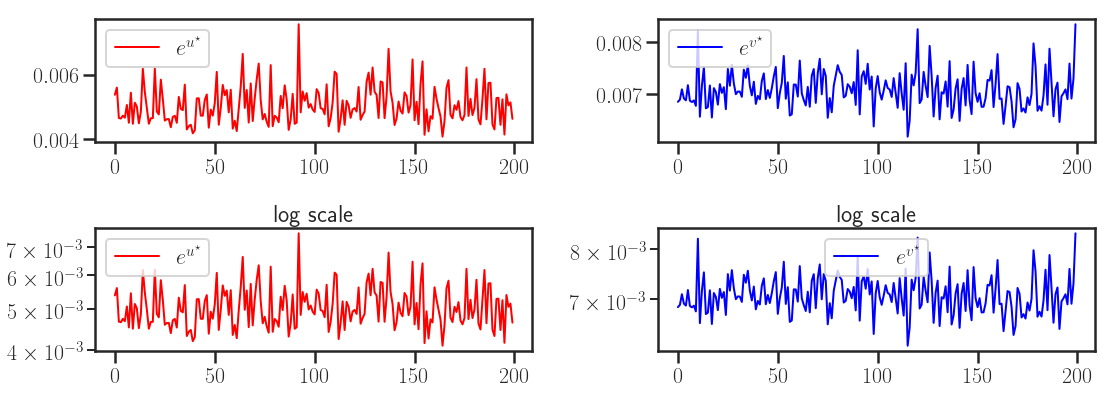

In [200]:
figure, axes= plt.subplots(nrows=2, ncols=2)

axes[0,0].plot(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
axes[0,1].plot(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
axes[0,0].legend()
axes[0,1].legend();

axes[1,0].semilogy(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
axes[1,1].semilogy(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
axes[1,0].legend()
axes[1,0].set_title("log scale")
axes[1,1].set_title("log scale")
axes[1,1].legend();
plt.subplots_adjust(hspace=.5)
plt.tight_layout()

## Search of the normalization constant 

In [201]:
# C = norm2exp_v_star/norm2exp_u_star
# C

# C = norm1exp_v_star / norm1exp_u_star
# C = norm_inftyexp_u_star / norm1exp_v_star
# C = norm_inftyexp_u_star
C_K = np.exp(- np.log(np.exp(- np.max(K))*np.min(np.hstack([a,b]))))
#C = C*norm_inftyexp_u_star
# C_ahmed = np.sqrt((exp_u_star/exp_v_star).mean()) # Ahmed
C_ = (np.sum(exp_u_star**2) / np.sum(exp_v_star**2))**(1/4)

C = (np.linalg.norm(exp_u_star)**2/ np.linalg.norm(exp_v_star)**2)**(1/4)

# print(C, C_K)
#print(np.linalg.norm((u_star/C_ahmed - v_star*C_ahmed), 1))
#print(np.linalg.norm((u_star/C - v_star*C), 1))
#C = C * C_K
#C = C_K
C, C_K 
C_K
C_KK = np.exp(1./(np.exp(-np.max(-M)/reg)*np.min(np.hstack([a,b]))))
C_K = 1.17

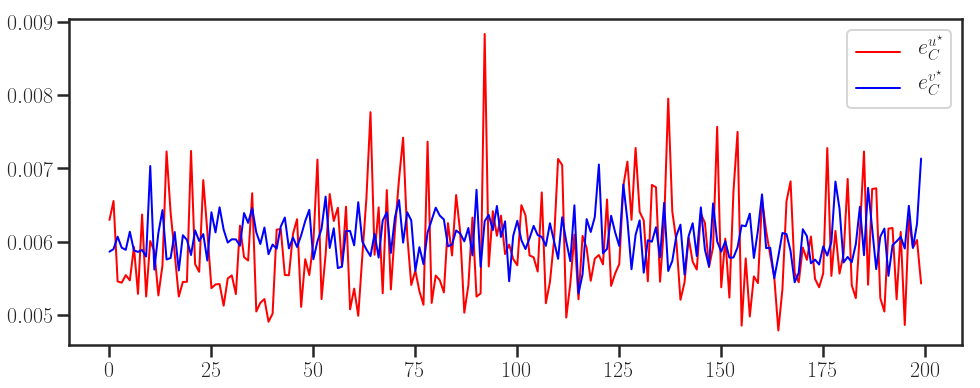

In [202]:
exp_u_star_C = exp_u_star*C_K  #norm_inftyexp_v_star #norm_inftyexp_u_star, norm_min1_exp_u_star, 
exp_v_star_C = exp_v_star/C_K
# exp_u_star_C = exp_u_star*100/C  #norm_inftyexp_v_star #norm_inftyexp_u_star, norm_min1_exp_u_star, 
# exp_v_star_C = exp_v_star*C/100 #norm_inftyexp_v_star)

# figure, axes= plt.subplots(ncols=2)
# axes[0].semilogy(exp_u_star_C, linewidth=2, color='r', label=r'$e^{u^\star}_C$')
 #axes[1].semilogy(exp_v_star_C, linewidth=2, color='b', label=r'$e^{v^\star}_C$')
 #axes[0].legend()
#axes[1].legend();
plt.plot(exp_u_star_C, linewidth=2, color='r', label=r'$e^{u^\star}_C$')
plt.plot(exp_v_star_C, linewidth=2, color='b', label=r'$e^{v^\star}_C$')
plt.legend();

### Plots of $u^\star$ and $v^\star$

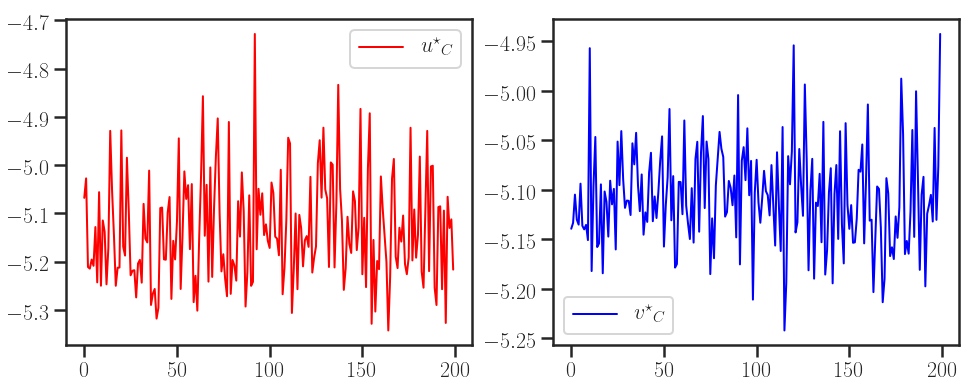

In [203]:
u_star_C = np.log(exp_u_star_C)
v_star_C = np.log(exp_v_star_C)

figure, axes= plt.subplots(ncols=2)
axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
axes[1].plot(v_star_C, linewidth=2, color='b', label=r'${v^\star}_C$')
axes[0].legend()
axes[1].legend();

epsilon = 0.006737946999085467


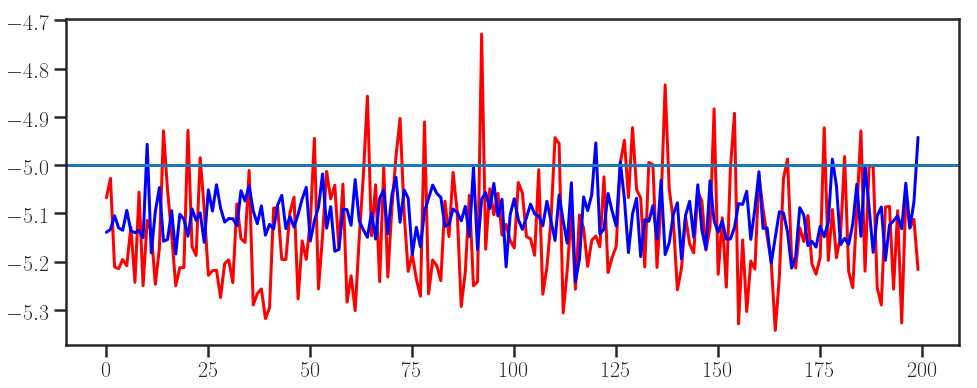

In [238]:
log_epsilon = -5. # -5.2
epsilon = np.exp(log_epsilon)
print('epsilon = %s' %epsilon)
plt.plot(u_star_C, 'r')
plt.plot(v_star_C, 'b')
plt.axhline(y=np.log(epsilon));

### Choosing of the intervals $I_u$ and $J_v$

In [239]:
I = np.where(exp_u_star_C > epsilon)[0].tolist()
Ic = np.where(exp_u_star_C <= epsilon)[0].tolist()
len(I), len(Ic)

(23, 177)

In [240]:
J = np.where(exp_v_star_C > epsilon)[0].tolist()
Jc = np.where(exp_v_star_C <= epsilon)[0].tolist()
len(J), len(Jc)

(5, 195)

# `screenkhorn`

In [241]:
screenkhorn = Screenkhorn(a, b, M, reg, epsilon)

## Projected Gradient Descent 

In [242]:
u0_epsilon = np.zeros(n_1)
v0_epsilon = np.zeros(n_2)
proj_grad_ord = screenkhorn.projected_grad(None, None, I, J, max_iter_backtracking=10,
                                           step_size=65, max_iter=1000, tol=1e-10, verbose=False)



  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/screenkhorn.py:268: UserWarning: Maxium number of line-search iterations reached.
  warnings.warn("Maxium number of line-search iterations reached.")


  2%|▏         | 17/1000 [00:00<00:05, 169.66it/s]



Achieved relative tolerance at iteration 52


### Curve of the objective function

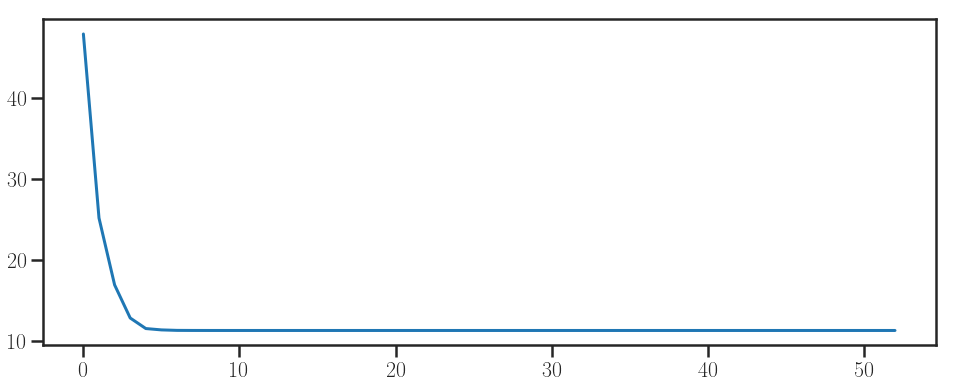

In [243]:
#plt.yscale("log")
obj_ord = proj_grad_ord["trace_obj"]
plt.plot(obj_ord);

### Sort of the solution by `screenkhorn` 

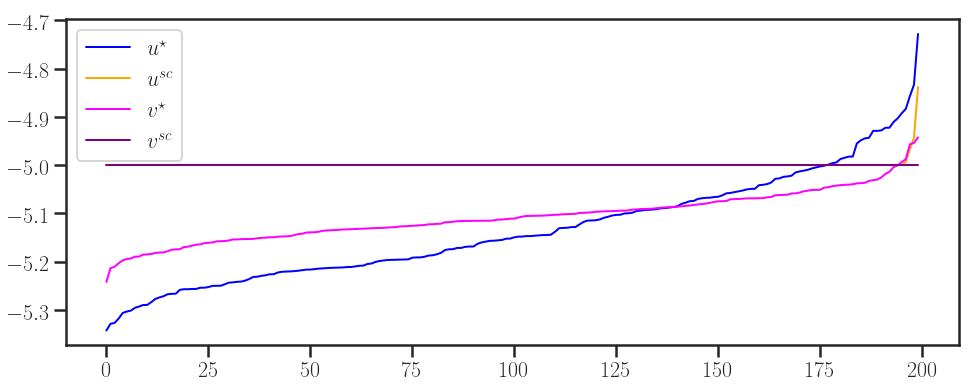

In [244]:
plt.plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
plt.plot(np.sort(proj_grad_ord["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
plt.plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')
plt.plot(np.sort(proj_grad_ord["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
# plt.axhline(y =np.log(epsilon), linewidth=, color='r', label=r'$\log(\varepsilon)$');
plt.legend(loc='best');
# plt.title(r'log-potentials vectors of sinkhorn and screenkhorn with ${maxIter}=10000,\,tol=1e-19$')
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.show();

In [226]:
# sinkhorn
P_star_C = np.diag(np.exp(u_star_C)) @ K @ np.diag(np.exp(v_star_C)) 
a_star_C = P_star_C @ np.ones(n_2)
b_star_C = P_star_C.T @ np.ones(n_1)

# screenkhorn via pgd
usc_ord = proj_grad_ord["usc"]
vsc_ord = proj_grad_ord["vsc"]
P_sc_ord = np.diag(np.exp(usc_ord)) @ K @ np.diag(np.exp(vsc_ord))
a_sc_ord = P_sc_ord @ np.ones(n_2)
b_sc_ord = P_sc_ord.T @ np.ones(n_1)

print("sum of the marginals in sinkhorn are: %s, \t %s" %(sum(a_star_C), sum(b_star_C)))
print("\t")
print("sum of the marginals in screenkhorn are: %s, \t %s" %(sum(a_sc_ord), sum(b_sc_ord)))
print("\t")
print("Difference in sinkhorn: %s \t %s:" %(abs(1 - sum(a_star_C)), abs(1 - sum(b_star_C))))
print("\t")
print("Difference in screenkhorn: %s \t  %s:" %(abs(1 - sum(a_sc_ord)), abs(1 - sum(b_sc_ord))))



sum of the marginals in sinkhorn are: 1.0000000000000007, 	 1.0000000000000007
	
sum of the marginals in screenkhorn are: 1.0249125738152134, 	 1.024912573815213
	
Difference in sinkhorn: 6.661338147750939e-16 	 6.661338147750939e-16:
	
Difference in screenkhorn: 0.02491257381521339 	  0.024912573815212946:


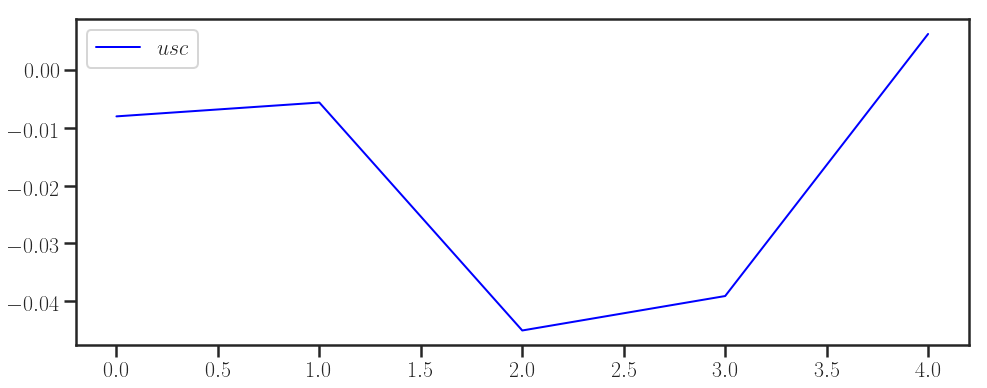

In [246]:
# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
# axes[1].plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
# axes[0].legend()
# axes[1].legend();
# plt.subplots_adjust(hspace=.5)

#plt.plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
plt.plot(vsc_ord[J] - log_epsilon, linewidth=2, color='b', label=r'$usc$')
plt.legend()
plt.legend();

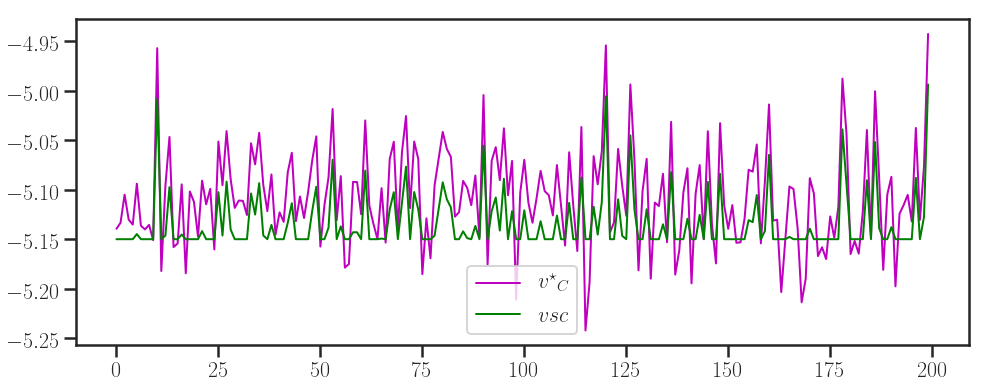

In [229]:
# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(v_star_C, linewidth=2, color='g', label=r'${v^\star}_C$')
# axes[1].plot(vsc_ord, linewidth=2, color='m', label=r'$vsc$')
# axes[0].legend()
# axes[1].legend();

plt.plot(v_star_C, linewidth=2, color='m', label=r'${v^\star}_C$')
plt.plot(vsc_ord, linewidth=2, color='g', label=r'$vsc$')
plt.legend()
plt.legend();

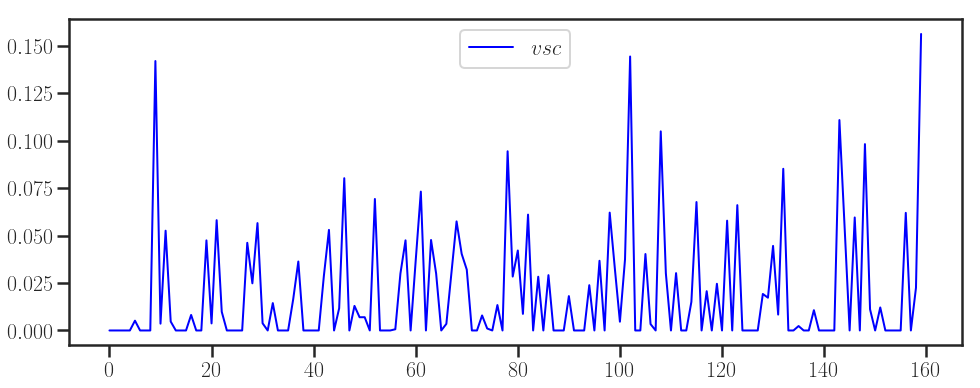

In [232]:
plt.plot(vsc_ord[J] - log_epsilon, linewidth=2, color='b', label=r'$vsc$')
plt.legend()
plt.legend();

In [ ]:
## Second Round of the PDG

In [234]:
## Index sets

I1 = np.where(usc_ord > log_epsilon)[0].tolist()
Ic1 = np.where(usc_ord  <= log_epsilon)[0].tolist()
len(I1), len(Ic1)

(100, 100)

In [236]:
J1 = np.where(vsc_ord  > log_epsilon)[0].tolist()
Jc1 = np.where(vsc_ord  <= log_epsilon)[0].tolist()
len(J1), len(Jc1)

(82, 118)

In [237]:
proj_grad_ord_bis = screenkhorn.projected_grad(usc_ord, vsc_ord, I1, J1, max_iter_backtracking=10,
                                           step_size=65, max_iter=1000, tol=1e-10, verbose=False)



  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/screenkhorn.py:268: UserWarning: Maxium number of line-search iterations reached.
  warnings.warn("Maxium number of line-search iterations reached.")




Achieved relative tolerance at iteration 1


## Block Projected Gradient Decsent

In [174]:
proj_grad_alt = screenkhorn.block_projected_grad(None, None, I, J, max_iter_backtracking=10,
                                       step_size=65., max_iter=1000, tol=1e-10, verbose=False)


  0%|          | 0/1000 [00:00<?, ?it/s]/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/screenkhorn.py:372: UserWarning: Maxium number of line-search iterations reached
  warnings.warn("Maxium number of line-search iterations reached")

100%|██████████| 1000/1000 [00:09<00:00, 109.59it/s]

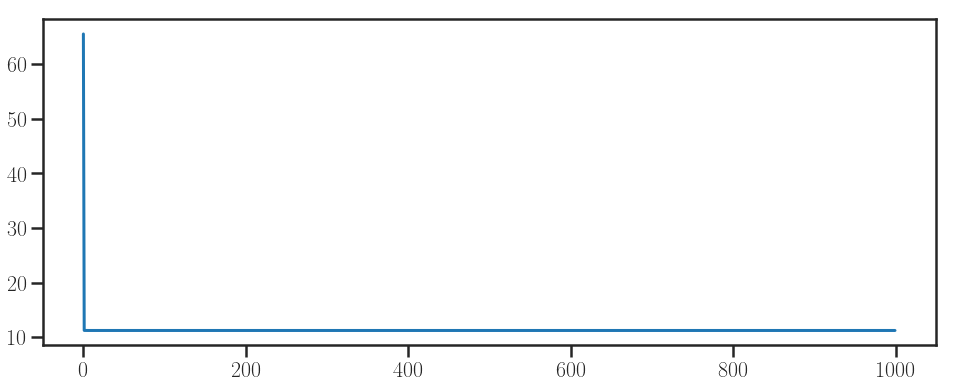

In [175]:
#plt.yscale("log")
obj_alt= proj_grad_alt["trace_obj"]
plt.plot(obj_alt);

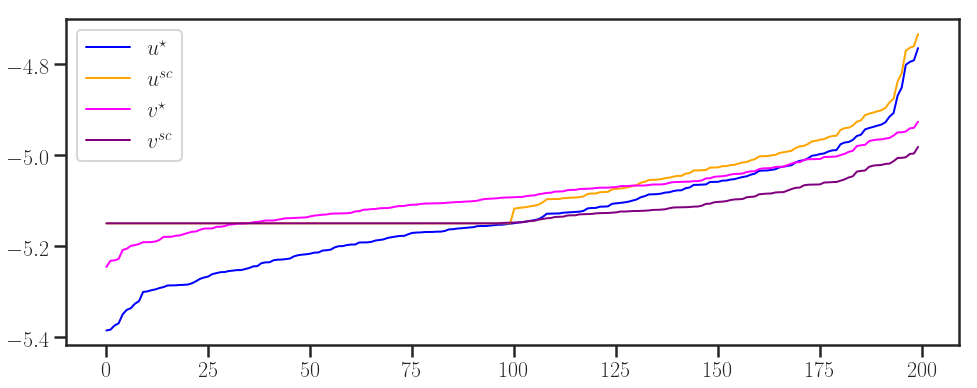

In [176]:
plt.plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
plt.plot(np.sort(proj_grad_alt["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
plt.plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')
plt.plot(np.sort(proj_grad_alt["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
# plt.axhline(y =np.log(epsilon), linewidth=, color='r', label=r'$\log(\varepsilon)$');
plt.legend(loc='best');
# plt.title(r'log-potentials vectors of sinkhorn and screenkhorn with ${maxIter}=10000,\,tol=1e-19$')
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.show();

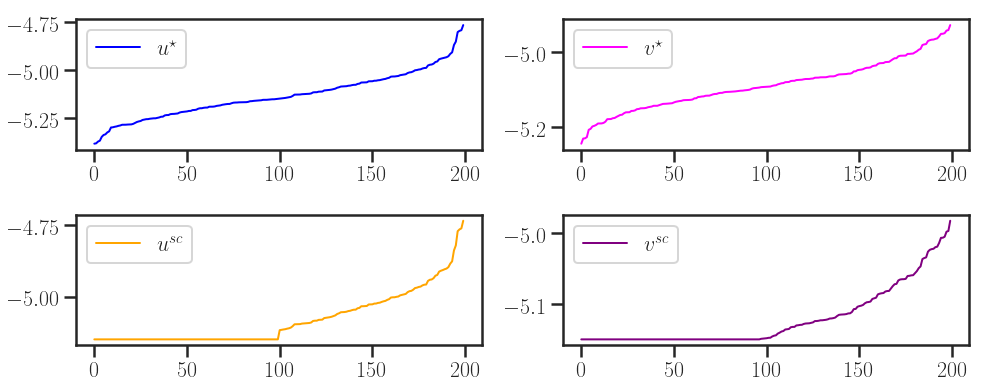

In [177]:
figure, axes= plt.subplots(nrows=2, ncols=2)

axes[0,0].plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
axes[0,1].plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')

axes[1,0].plot(np.sort(proj_grad_alt["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
axes[1,1].plot(np.sort(proj_grad_alt["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.subplots_adjust(hspace=.5)

In [178]:
# screenkhorn via pgd
usc_alt = proj_grad_alt["usc"]
vsc_alt = proj_grad_alt["vsc"]
P_sc_alt = np.diag(np.exp(usc_alt)) @ K @ np.diag(np.exp(vsc_alt))
a_sc_alt = P_sc_alt @ np.ones(n_2)
b_sc_alt  = P_sc_alt.T @ np.ones(n_1)

print("sum of the marginals in sinkhorn are: %s, \t %s" %(sum(a_star_C), sum(b_star_C)))
print("\t")
print("sum of the marginals in screenkhorn are: %s, \t %s" %(sum(a_sc_alt), sum(b_sc_alt)))
print("\t")
print("Difference in sinkhorn: %s \t %s:" %(abs(1 - sum(a_star_C)), abs(1 - sum(b_star_C))))
print("\t")
print("Difference in screenkhorn: %s \t  %s:" %(abs(1 - sum(a_sc_alt)), abs(1 - sum(b_sc_alt))))

sum of the marginals in sinkhorn are: 1.0000000000000007, 	 1.0000000000000007
	
sum of the marginals in screenkhorn are: 1.0239300730159686, 	 1.023930073015968
	
Difference in sinkhorn: 6.661338147750939e-16 	 6.661338147750939e-16:
	
Difference in screenkhorn: 0.02393007301596861 	  0.023930073015967945:


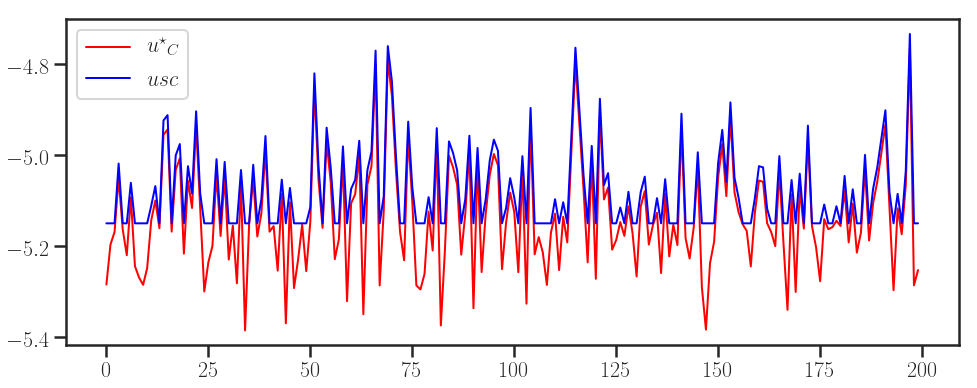

In [179]:
usc_alt = proj_grad_alt["usc"]
vsc_alt = proj_grad_alt["vsc"]

# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
# axes[1].plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
# axes[0].legend()
# axes[1].legend();
# plt.subplots_adjust(hspace=.5)
plt.plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
plt.plot(usc_alt, linewidth=2, color='b', label=r'$usc$')
plt.legend();

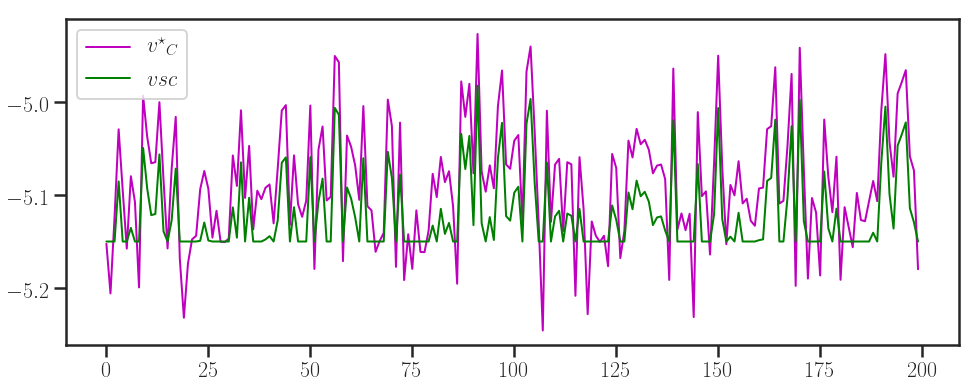

In [180]:
# figure, axes= plt.subplots(nrows=2)

# axes[0].plot(v_star_C, linewidth=2, color='g', label=r'${v^\star}_C$')
# axes[1].plot(vsc_alt, linewidth=2, color='m', label=r'$vsc$')
# axes[0].legend()
# axes[1].legend();

plt.plot(v_star_C, linewidth=2, color='m', label=r'${v^\star}_C$')
plt.plot(vsc_alt, linewidth=2, color='g', label=r'$vsc$')
plt.legend();

## Accelerated Projected Gradient Descent

In [184]:
proj_grad_acc = screenkhorn.accelerated_projected_grad(np.zeros(n_1), np.zeros(n_2), I, J, 
                                                       max_iter_backtracking=70,
                                         step_size=45., max_iter=1000, tol=1e-10, verbose=False)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 2/1000 [00:00<00:50, 19.65it/s]

  0%|          | 5/1000 [00:00<00:46, 21.58it/s]

  2%|▏         | 15/1000 [00:00<00:34, 28.21it/s]

  3%|▎         | 29/1000 [00:00<00:26, 36.97it/s]

  4%|▍         | 41/1000 [00:00<00:20, 46.65it/s]

  5%|▌         | 54/1000 [00:00<00:16, 57.19it/s]

  7%|▋         | 66/1000 [00:00<00:13, 67.83it/s]

  8%|▊         | 80/1000 [00:00<00:11, 79.93it/s]

 10%|▉         | 96/1000 [00:00<00:09, 93.74it/s]

 11%|█         | 112/1000 [00:01<00:08, 106.12it/s]

 13%|█▎        | 127/1000 [00:01<00:07, 115.21it/s]

 14%|█▍        | 142/1000 [00:01<00:06, 122.94it/s]

 16%|█▌        | 156/1000 [00:01<00:17, 47.26it/s] 

 17%|█▋        | 167/1000 [00:02<00:28, 28.93it/s]

 18%|█▊        | 175/1000 [00:03<00:34, 24.26it/s]

 18%|█▊        | 181/1000 [00:03<00:36, 22.20it/s]

 19%|█▊        | 186/1000 [00:03<00:39, 20.71it/s]

 19%|█▉        | 190/1000 [00:03<00:40, 20.23it/s]

 19%|█▉        | 194/1000 [

 44%|████▍     | 442/1000 [00:19<00:34, 16.21it/s]

 44%|████▍     | 444/1000 [00:19<00:36, 15.15it/s]

 45%|████▍     | 446/1000 [00:20<00:38, 14.42it/s]

 45%|████▍     | 448/1000 [00:20<00:37, 14.57it/s]

 45%|████▌     | 450/1000 [00:20<00:38, 14.34it/s]

 45%|████▌     | 452/1000 [00:20<00:38, 14.17it/s]

 45%|████▌     | 454/1000 [00:20<00:36, 15.05it/s]

 46%|████▌     | 456/1000 [00:20<00:34, 15.90it/s]

 46%|████▌     | 458/1000 [00:20<00:33, 16.10it/s]

 46%|████▌     | 460/1000 [00:20<00:32, 16.63it/s]

 46%|████▌     | 462/1000 [00:21<00:31, 17.03it/s]

 46%|████▋     | 464/1000 [00:21<00:30, 17.38it/s]

 47%|████▋     | 466/1000 [00:21<00:31, 16.86it/s]

 47%|████▋     | 468/1000 [00:21<00:31, 17.15it/s]

 47%|████▋     | 470/1000 [00:21<00:30, 17.23it/s]

 47%|████▋     | 472/1000 [00:21<00:30, 17.20it/s]

 47%|████▋     | 474/1000 [00:21<00:30, 17.12it/s]

 48%|████▊     | 476/1000 [00:21<00:33, 15.88it/s]

 48%|████▊     | 478/1000 [00:22<00:34, 15.02it/s]

 48%|████▊  

 72%|███████▏  | 724/1000 [00:37<00:17, 15.59it/s]

 73%|███████▎  | 726/1000 [00:37<00:18, 15.11it/s]

 73%|███████▎  | 728/1000 [00:37<00:17, 15.36it/s]

 73%|███████▎  | 730/1000 [00:37<00:16, 15.92it/s]

 73%|███████▎  | 732/1000 [00:37<00:16, 16.28it/s]

 73%|███████▎  | 734/1000 [00:37<00:17, 15.50it/s]

 74%|███████▎  | 736/1000 [00:37<00:17, 15.21it/s]

 74%|███████▍  | 738/1000 [00:38<00:16, 15.89it/s]

 74%|███████▍  | 740/1000 [00:38<00:16, 16.24it/s]

 74%|███████▍  | 742/1000 [00:38<00:16, 15.60it/s]

 74%|███████▍  | 744/1000 [00:38<00:17, 15.04it/s]

 75%|███████▍  | 746/1000 [00:38<00:16, 15.28it/s]

 75%|███████▍  | 748/1000 [00:38<00:15, 16.30it/s]

 75%|███████▌  | 750/1000 [00:38<00:15, 16.52it/s]

 75%|███████▌  | 752/1000 [00:39<00:16, 14.69it/s]

 75%|███████▌  | 754/1000 [00:39<00:15, 15.39it/s]

 76%|███████▌  | 756/1000 [00:39<00:15, 15.48it/s]

 76%|███████▌  | 758/1000 [00:39<00:15, 15.90it/s]

 76%|███████▌  | 760/1000 [00:39<00:15, 15.08it/s]

 76%|███████

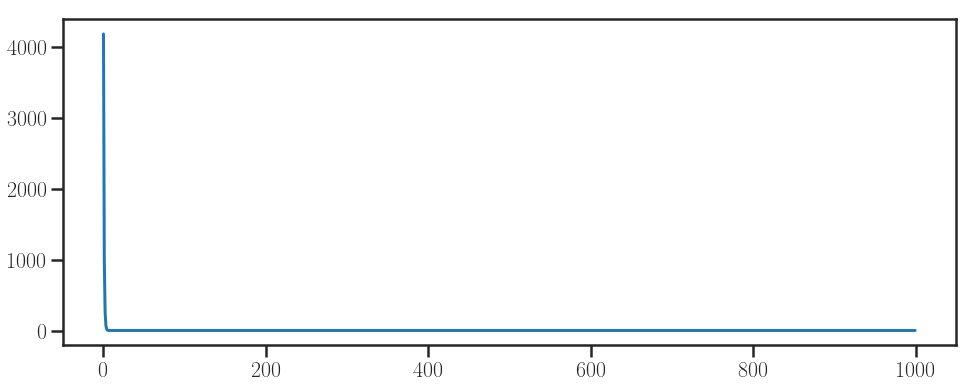

In [185]:
#plt.yscale("log")
obj_acc= proj_grad_acc["trace_obj"]
plt.plot(obj_acc);

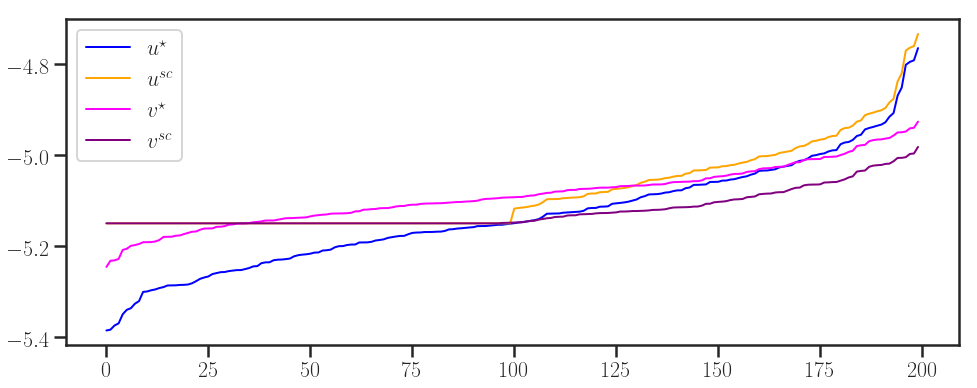

In [186]:
plt.plot(np.sort(u_star_C), 'blue', linewidth=2, label =r'${u^\star}$')
plt.plot(np.sort(proj_grad_acc["usc"]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
plt.plot(np.sort(v_star_C), 'magenta', linewidth=2, label =r'${v^\star}$')
plt.plot(np.sort(proj_grad_acc["vsc"]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
# plt.axhline(y =np.log(epsilon), linewidth=, color='r', label=r'$\log(\varepsilon)$');
plt.legend(loc='best');
# plt.title(r'log-potentials vectors of sinkhorn and screenkhorn with ${maxIter}=10000,\,tol=1e-19$')
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.show();

In [187]:
# screenkhorn via pgd
usc_acc = proj_grad_acc["usc"]
vsc_acc = proj_grad_acc["vsc"]
P_sc_acc = np.diag(np.exp(usc_acc)) @ K @ np.diag(np.exp(vsc_acc))
a_sc_acc = P_sc_acc @ np.ones(n_2)
b_sc_acc  = P_sc_acc.T @ np.ones(n_1)

print(sum(a_star_C), sum(b_star_C))
print("\t")
print(sum(a_sc_acc), sum(b_sc_acc))
print("\n")
print(abs(1 - sum(a_star_C)), abs(1 - sum(b_star_C)))
print("\t")
print(abs(1 - sum(a_sc_acc)), abs(1 - sum(b_sc_acc)))

1.0000000000000007 1.0000000000000007
	
1.0239300732148575 1.023930073214858


6.661338147750939e-16 6.661338147750939e-16
	
0.023930073214857517 0.02393007321485796


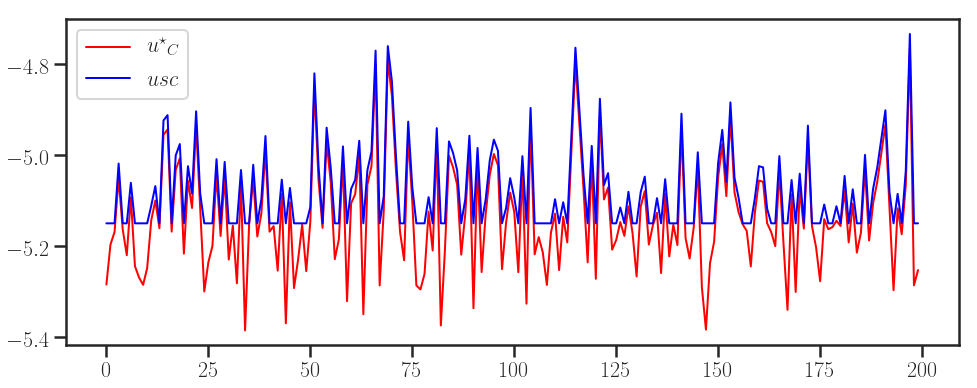

In [188]:
usc_alt = proj_grad_acc["usc"]
vsc_alt = proj_grad_acc["vsc"]

# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
# axes[1].plot(usc_ord, linewidth=2, color='b', label=r'$usc$')
# axes[0].legend()
# axes[1].legend();
# plt.subplots_adjust(hspace=.5)

plt.plot(u_star_C, linewidth=2, color='r', label=r'${u^\star}_C$')
plt.plot(usc_acc, linewidth=2, color='b', label=r'$usc$')
plt.legend()
plt.legend();

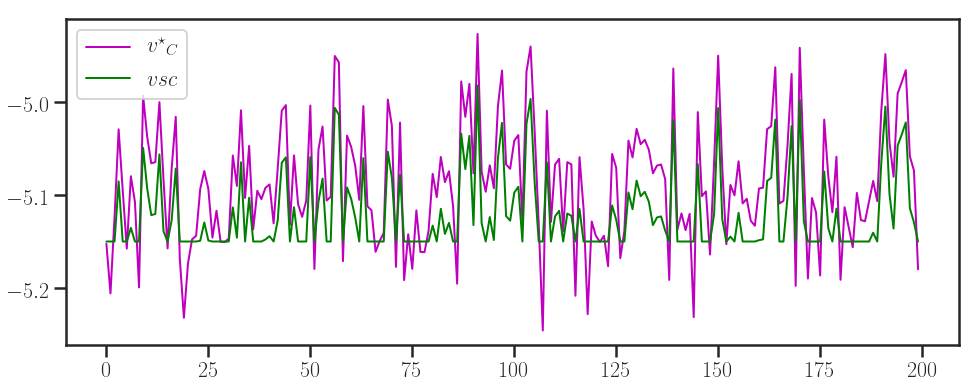

In [189]:
# figure, axes= plt.subplots(nrows=2)
# axes[0].plot(v_star_C, linewidth=2, color='g', label=r'${v^\star}_C$')
# axes[1].plot(vsc_alt, linewidth=2, color='m', label=r'$vsc$')
# axes[0].legend()
# axes[1].legend();

plt.plot(v_star_C, linewidth=2, color='m', label=r'${v^\star}_C$')
plt.plot(vsc_acc, linewidth=2, color='g', label=r'$vsc$')
plt.legend()
plt.legend();